# Global Forest Watch

### Import Dependencies

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import matplotlib.animation as animation
import matplotlib as mpl
from IPython.display import HTML
import country_converter as coco

## Cleaning

In [28]:
# Load the Global Forest Watch dataset
file_path = './data/deforestation_raw.csv'
gfw_data = pd.read_csv(file_path, low_memory=False)

# Display the first 10 rows of the dataset
gfw_data.head(10)

,country,threshold,area,extent_2000,extent_2010,gain_2000-2020,loss_2001,loss_2002,loss_2003,loss_2004,...,emissions_2019,emissions_2020,emissions_2021,emissions_2022,emissions_2023,subnational1,iso,loss__year,tree_cover_loss,tree_cover_loss_from_fires
0,Afghanistan,0,64385715,64385715,64385715,10741,103,214,267,225,...,NaN,NaN,NaN,NaN,NaN,NaN,AFG,2001.0,88.092712,12.249294
1,Afghanistan,10,64385715,432115,126247,10741,92,190,253,207,...,NaN,NaN,NaN,NaN,NaN,NaN,AGO,2001.0,101220.621500,888.694561
2,Afghanistan,15,64385715,302660,106867,10741,91,186,247,205,...,NaN,NaN,NaN,NaN,NaN,NaN,AIA,2001.0,3.878461,0.000000
3,Afghanistan,20,64385715,284357,105733,10741,89,180,245,203,...,NaN,NaN,NaN,NaN,NaN,NaN,ALA,2001.0,396.934826,8.129861
4,Afghanistan,25,64385715,254867,72395,10741,89,180,245,202,...,NaN,NaN,NaN,NaN,NaN,NaN,ALB,2001.0,3729.021031,754.554994
5,Afghanistan,30,64385715,205791,71797,10741,88,179,244,201,...,3687.0,11387.0,6746.0,1908.0,3296.0,NaN,AND,2001.0,1.654213,0.285373
6,Afghanistan,50,64385715,148430,46242,10741,78,135,200,159,...,3327.0,10299.0,6020.0,1661.0,2407.0,NaN,ARG,2001.0,147805.950400,7972.718403
7,Afghanistan,75,64385715,75486,18270,10741,47,61,96,61,...,1734.0,6438.0,2460.0,666.0,1739.0,NaN,ARM,2001.0,131.840612,28.985651
8,Akrotiri and Dhekelia,0,23448,23448,23448,42,2,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,ATG,2001.0,24.074189,0.368164
9,Akrotiri and Dhekelia,10,23448,1216,563,42,2,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,AUS,2001.0,218816.302100,154497.154000


In [29]:
gfw_data.describe()

,threshold,area,extent_2000,extent_2010,gain_2000-2020,loss_2001,loss_2002,loss_2003,loss_2004,loss_2005,...,emissions_2017,emissions_2018,emissions_2019,emissions_2020,emissions_2021,emissions_2022,emissions_2023,loss__year,tree_cover_loss,tree_cover_loss_from_fires
count,29888.000000,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,2.988800e+04,...,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,1.120800e+04,4571.000000,4.571000e+03,4.571000e+03
mean,28.125000,7.095997e+06,2.725051e+06,2.685809e+06,7.005051e+04,7.034324e+03,8.577101e+03,7.540283e+03,1.034466e+04,9.502744e+03,...,6.060456e+06,5.023387e+06,4.813313e+06,4.950016e+06,4.960194e+06,4.870291e+06,5.958930e+06,2011.850361,1.066996e+05,3.022008e+04
std,22.491694,4.717176e+07,2.410581e+07,2.388483e+07,7.670669e+05,7.134465e+04,9.640049e+04,8.793128e+04,1.133960e+05,9.755882e+04,...,5.578451e+07,4.420133e+07,3.984519e+07,4.273659e+07,4.460947e+07,4.571422e+07,6.357170e+07,6.624496,4.496165e+05,2.581936e+05
min,0.000000,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00
25%,13.750000,1.238338e+05,4.912500e+03,4.558750e+03,2.077500e+02,4.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,...,2.590000e+02,1.892500e+02,1.620000e+02,2.330000e+02,3.887500e+02,3.810000e+02,6.837500e+02,2006.000000,7.765850e+01,1.625515e+00
50%,22.500000,6.197910e+05,1.052395e+05,1.028950e+05,2.491000e+03,1.070000e+02,8.600000e+01,6.900000e+01,1.220000e+02,1.100000e+02,...,6.389700e+04,4.197350e+04,3.833000e+04,4.248900e+04,4.756400e+04,4.480150e+04,6.244400e+04,2012.000000,3.468760e+03,7.392309e+01
75%,35.000000,2.915070e+06,6.886515e+05,6.689635e+05,1.657675e+04,1.071000e+03,1.015250e+03,7.780000e+02,1.202250e+03,1.234250e+03,...,9.582792e+05,7.323638e+05,7.070942e+05,7.441522e+05,7.592595e+05,7.477075e+05,8.506665e+05,2018.000000,4.042546e+04,9.462224e+02
max,75.000000,1.689455e+09,1.689455e+09,1.689455e+09,3.722054e+07,2.933280e+06,3.716128e+06,3.489399e+06,4.133894e+06,3.676303e+06,...,2.633356e+09,1.814375e+09,1.610957e+09,1.903415e+09,1.985685e+09,2.202634e+09,3.736248e+09,2023.000000,8.570168e+06,7.757410e+06


In [30]:
# Remove all rows that contain any NaN values
#gfw_data_cleaned = gfw_data.dropna()

# Display the first 20 rows of the cleaned dataset
#gfw_data_cleaned.head(20)

In [31]:
# Fill NaN values with 0
#gfw_data_filled = gfw_data.fillna(0)

# Display the first 20 rows of the dataset with NaN values filled
#gfw_data_filled.head(10)

In [32]:
# Remove duplicate rows
gfw_data = gfw_data.drop_duplicates()

# Save the cleaned DataFrame with renamed columns to a new CSV file
#gfw_data_cleaned.to_csv('./data/deforestation.csv', index=False)

In [33]:
# Keep relevant columns (country, forest loss over the years, and carbon emissions)
relevant_columns = ['country', 'loss_2023']
gfw_data_filtered = gfw_data[relevant_columns]
gfw_data_filtered

,country,loss_2023
0,Afghanistan,133
1,Afghanistan,32
2,Afghanistan,22
3,Afghanistan,22
4,Afghanistan,20
...,...,...
29883,Åland,43
29884,Åland,43
29885,Åland,43
29886,Åland,41


### Keep columns threshold 30 or higher to replicate GFW method

In [34]:
gfw_30_thresh = gfw_data[gfw_data['threshold'] >= 30]
gfw_30_thresh.head()

,country,threshold,area,extent_2000,extent_2010,gain_2000-2020,loss_2001,loss_2002,loss_2003,loss_2004,...,emissions_2019,emissions_2020,emissions_2021,emissions_2022,emissions_2023,subnational1,iso,loss__year,tree_cover_loss,tree_cover_loss_from_fires
5,Afghanistan,30,64385715,205791,71797,10741,88,179,244,201,...,3687.0,11387.0,6746.0,1908.0,3296.0,NaN,AND,2001.0,1.654213,0.285373
6,Afghanistan,50,64385715,148430,46242,10741,78,135,200,159,...,3327.0,10299.0,6020.0,1661.0,2407.0,NaN,ARG,2001.0,147805.950400,7972.718403
7,Afghanistan,75,64385715,75486,18270,10741,47,61,96,61,...,1734.0,6438.0,2460.0,666.0,1739.0,NaN,ARM,2001.0,131.840612,28.985651
13,Akrotiri and Dhekelia,30,23448,456,383,42,2,1,0,2,...,204.0,321.0,212.0,39.0,0.0,NaN,BEL,2001.0,971.488195,10.199186
14,Akrotiri and Dhekelia,50,23448,336,238,42,1,1,0,2,...,204.0,81.0,185.0,39.0,0.0,NaN,BEN,2001.0,3749.331105,8.461169


In [35]:
# Rename country columns

In [36]:
country = gfw_30_thresh['country']
country_standard = coco.convert(names=country, to='name_short')
print(country_standard)

Akrotiri and Dhekelia not found in regex
Akrotiri and Dhekelia not found in regex
Akrotiri and Dhekelia not found in regex
Caspian Sea not found in regex
Caspian Sea not found in regex
Caspian Sea not found in regex
Clipperton Island not found in regex
Clipperton Island not found in regex
Clipperton Island not found in regex
Paracel Islands not found in regex
Paracel Islands not found in regex
Paracel Islands not found in regex
Spratly Islands not found in regex
Spratly Islands not found in regex
Spratly Islands not found in regex
Akrotiri and Dhekelia not found in regex
Akrotiri and Dhekelia not found in regex
Akrotiri and Dhekelia not found in regex
Akrotiri and Dhekelia not found in regex
Akrotiri and Dhekelia not found in regex
Akrotiri and Dhekelia not found in regex


['Afghanistan', 'Afghanistan', 'Afghanistan', 'not found', 'not found', 'not found', 'Albania', 'Albania', 'Albania', 'Algeria', 'Algeria', 'Algeria', 'Andorra', 'Andorra', 'Andorra', 'Angola', 'Angola', 'Angola', 'Anguilla', 'Anguilla', 'Anguilla', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Antigua and Barbuda', 'Argentina', 'Argentina', 'Argentina', 'Armenia', 'Armenia', 'Armenia', 'Aruba', 'Aruba', 'Aruba', 'Australia', 'Australia', 'Australia', 'Austria', 'Austria', 'Austria', 'Azerbaijan', 'Azerbaijan', 'Azerbaijan', 'Bahamas', 'Bahamas', 'Bahamas', 'Bahrain', 'Bahrain', 'Bahrain', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Barbados', 'Barbados', 'Barbados', 'Belarus', 'Belarus', 'Belarus', 'Belgium', 'Belgium', 'Belgium', 'Belize', 'Belize', 'Belize', 'Benin', 'Benin', 'Benin', 'Bermuda', 'Bermuda', 'Bermuda', 'Bhutan', 'Bhutan', 'Bhutan', 'Bolivia', 'Bolivia', 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Bonaire, Saint Eustatius and Saba', 'Bonaire, Saint Eustatius and S

In [37]:
# Rename the existing 'country' column to 'country_old'
filtered_gfw = gfw_30_thresh.rename(columns={'country': 'country_old'})

# Add the new country_standard to filtered_gfw
filtered_gfw['country'] = country_standard

# Display the updated DataFrame
print(filtered_gfw.head())

              country_old  threshold      area  extent_2000  extent_2010  \
5             Afghanistan         30  64385715       205791        71797   
6             Afghanistan         50  64385715       148430        46242   
7             Afghanistan         75  64385715        75486        18270   
13  Akrotiri and Dhekelia         30     23448          456          383   
14  Akrotiri and Dhekelia         50     23448          336          238   

    gain_2000-2020  loss_2001  loss_2002  loss_2003  loss_2004  ...  \
5            10741         88        179        244        201  ...   
6            10741         78        135        200        159  ...   
7            10741         47         61         96         61  ...   
13              42          2          1          0          2  ...   
14              42          1          1          0          2  ...   

    emissions_2020  emissions_2021  emissions_2022  emissions_2023  \
5          11387.0          6746.0          19

In [38]:
### Update year column labels

In [39]:
# Identify the 'loss_year' columns 
loss_year_columns = [f'loss_{year}' for year in range(2001, 2024)]

# Create a dictionary to rename the columns
rename_dict = {old_name: str(year) for old_name, year in zip(loss_year_columns, range(2001, 2024))}

# Rename the loss year columns
filtered_gfw.rename(columns=rename_dict, inplace=True)

print(filtered_gfw.head())

              country_old  threshold      area  extent_2000  extent_2010  \
5             Afghanistan         30  64385715       205791        71797   
6             Afghanistan         50  64385715       148430        46242   
7             Afghanistan         75  64385715        75486        18270   
13  Akrotiri and Dhekelia         30     23448          456          383   
14  Akrotiri and Dhekelia         50     23448          336          238   

    gain_2000-2020  2001  2002  2003  2004  ...  emissions_2020  \
5            10741    88   179   244   201  ...         11387.0   
6            10741    78   135   200   159  ...         10299.0   
7            10741    47    61    96    61  ...          6438.0   
13              42     2     1     0     2  ...           321.0   
14              42     1     1     0     2  ...            81.0   

    emissions_2021  emissions_2022  emissions_2023  subnational1  iso  \
5           6746.0          1908.0          3296.0           NaN  A

In [40]:
# Export the data
output_dir = 'data'

# Export the DataFrame to a CSV file
filtered_gfw.to_csv(os.path.join(output_dir, 'tree_loss_clean.csv'), index=False)

---

## Analysis

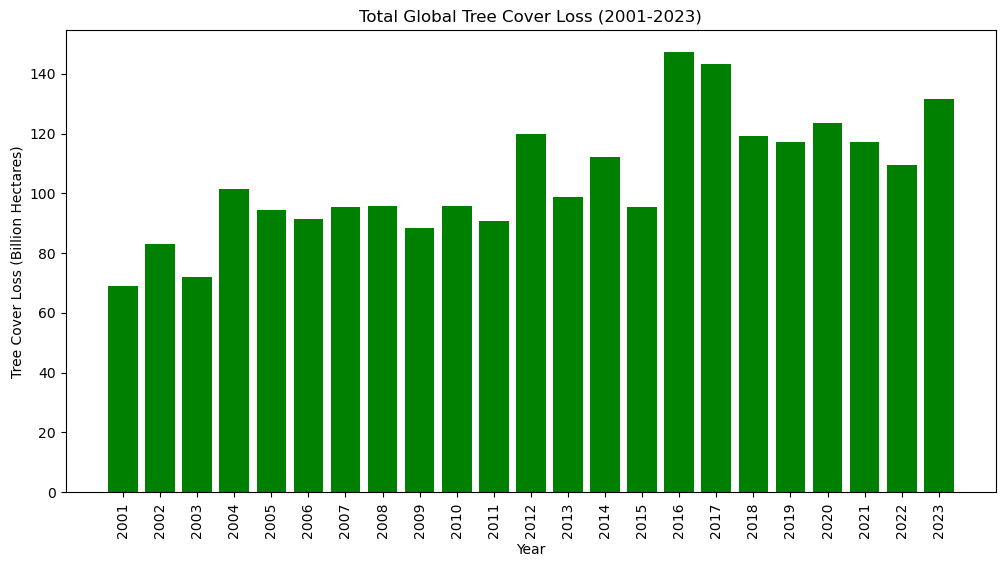

In [41]:
# Create a bar chart of tree cover loss over the years
years = [str(year) for year in range(2001, 2024)]

# Sum tree cover loss globally for each year
total_tree_cover_loss = filtered_gfw[years].sum()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, total_tree_cover_loss/1000000, color='green')
plt.xticks(rotation=90)
plt.title('Total Global Tree Cover Loss (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (Billion Hectares)')
plt.show()


In [42]:
# Top 10 Countries with the Highest Forest Loss in 2023:

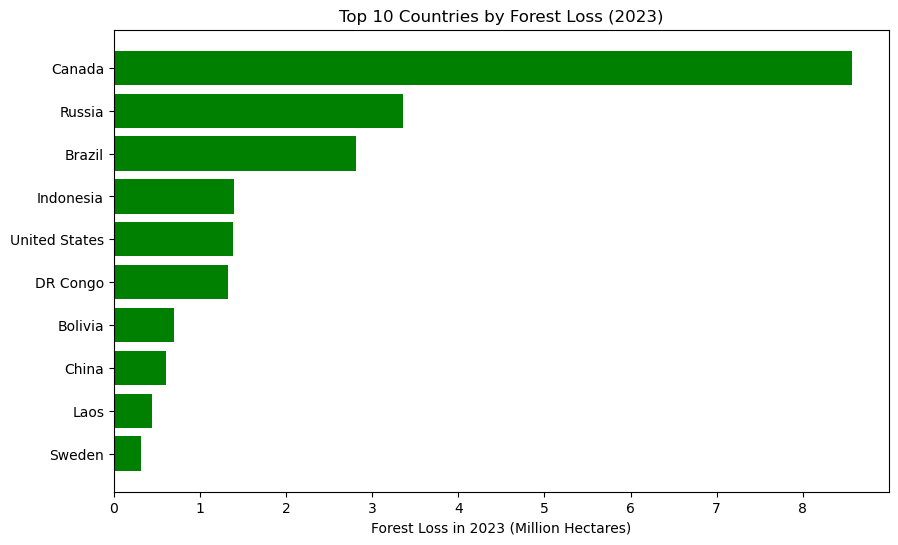

In [43]:
# Remove duplicates by keeping the maximum 'loss_2023' value for each country
gfw_data_filtered_max = filtered_gfw.groupby('country', as_index=False).agg({'2023': 'max'})

# Filter out countries with zero forest loss
gfw_data_filtered_max = gfw_data_filtered_max[gfw_data_filtered_max['2023'] > 0]

# Sort by forest loss and get the top 10 countries
top_10_loss = gfw_data_filtered_max.nlargest(10, '2023')

# Step 4: Create the bar chart for the top 10 countries by forest loss
plt.figure(figsize=(10, 6))
plt.barh(top_10_loss['country'], top_10_loss['2023']/1000000, color='green')
plt.xlabel('Forest Loss in 2023 (Million Hectares)')
plt.title('Top 10 Countries by Forest Loss (2023)')
plt.gca().invert_yaxis()  
plt.show()

In [44]:
# Carbon Emission 
# Line Plot of Carbon Emissions Over Time:

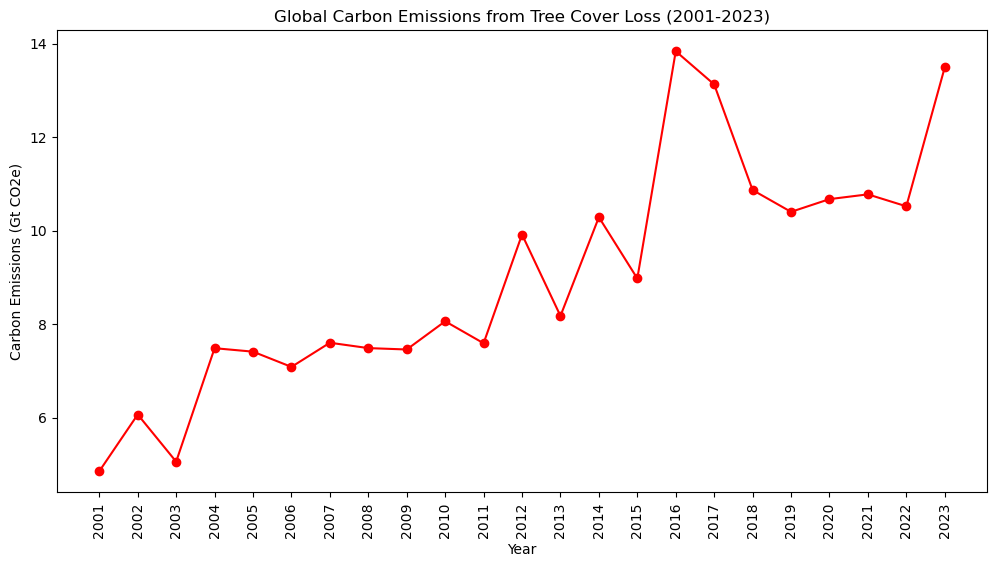

In [46]:
# Identify the 'loss_year' columns 
loss_year_columns = [f'loss_{year}' for year in range(2001, 2024)]

# Create a dictionary to rename the columns
rename_dict = {old_name: str(year) for old_name, year in zip(loss_year_columns, range(2001, 2024))}

# Rename the loss year columns
gfw_data.rename(columns=rename_dict, inplace=True)

# Filter for 30 threshold
gfw_30_th = gfw_data[gfw_data['threshold'] == 30]

# Remove duplicates
gfw_30_th = gfw_30_th.drop_duplicates(subset=['country'])

# Define the years for the x-axis
years = [str(year) for year in range(2001, 2024)]

# List of columns for carbon emissions
years_emissions = [f'emissions_{year}' for year in years]

# Calculate total emissions
total_emissions = gfw_30_th[years_emissions].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(years, total_emissions/1000000000, color='red', marker='o')
plt.xticks(rotation=90)
plt.title('Global Carbon Emissions from Tree Cover Loss (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (Gt CO2e)')

plt.show()

In [ ]:
# Plot Carbon Emissions due to Forest Loss (Top 10 Countries):


In [ ]:
# Remove duplicates by keeping the maximum 'loss_2023' value for each country
gfw_data_filtered_max = filtered_gfw.groupby('country', as_index=False).agg({'2023': 'max', 'emissions_2023': 'max'})

# Filter out countries with zero forest loss
gfw_data_filtered_max = gfw_data_filtered_max[gfw_data_filtered_max['2023'] > 0]

# Sort the data by carbon emissions and get the top 10 countries
top_10_emissions = gfw_data_filtered_max.nlargest(10, 'emissions_2023')

# Create the vertical bar chart for the top 10 countries by carbon emissions
plt.figure(figsize=(10, 6))
plt.bar(top_10_emissions['country'], top_10_emissions['emissions_2023']/1000000000, color='red')
plt.xlabel('Country')
plt.ylabel('Carbon Emissions (t CO2e)')
plt.title('Top 10 Countries by Carbon Emissions due to Forest Loss (2023)')

# Increase the rotation and adjust layout for readability
plt.xticks(rotation=60, ha='right')  
plt.tight_layout()  

plt.show()

In [ ]:
# # Display the loss_2023 values
# gfw_data_filtered[['country', 'loss_2023']].sort_values(by='loss_2023', ascending=False)


In [ ]:
# Correlation Between Forest Loss and Carbon Emissions

In [ ]:
# # Create a scatter plot with color gradient based on 'emissions_2023'
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(gfw_data['loss_2023'], gfw_data['emissions_2023'], 
#                       c=gfw_data['emissions_2023'], cmap='viridis')  # 'viridis' is a commonly used color map

# # Add a color bar to show the gradient scale
# plt.colorbar(scatter, label='Carbon Emissions (Mg CO2e)')

# plt.title('Tree Cover Loss vs Carbon Emissions (2023)')
# plt.xlabel('Tree Cover Loss (Hectares)')
# plt.ylabel('Carbon Emissions (Mg CO2e)')
# plt.show()



In [ ]:
#Time-Lapse Data (Optional)

In [ ]:
# # Select the top 5 countries with the highest forest loss in 2023
# top_5_countries = top_10_loss['country'].head(5)

# # Filter data for the top 5 countries
# gfw_top5 = gfw_data[gfw_data['country'].isin(top_5_countries)]

# # Plot forest loss over time for the top 5 countries
# years = [f'loss_{year}' for year in range(2001, 2024)]  # Years 2001 to 2023
# plt.figure(figsize=(12, 8))

# # Plot for each country
# for country in top_5_countries:
#     plt.plot(years, gfw_top5[gfw_top5['country'] == country][years].values[0], label=country)

# plt.title('Change in Forest Loss Over Time (Top 5 Countries)')
# plt.xlabel('Year')
# plt.ylabel('Tree Cover Loss (Hectares)')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [ ]:
# Create a Choropleth Map of Deforestation Rates in 2023:

In [ ]:
# # Load world shape data from the downloaded shapefile
# shapefile_path = './data/natural_earth_countries/ne_110m_admin_0_countries.shp' # Adjust the path
# world = gpd.read_file(shapefile_path)

# # Merge deforestation data with world shapefile based on country name
# merged_data = world.merge(filtered_gfw, how='left', left_on='NAME', right_on='country')

# # Step 5: Remove duplicates based on the 'country' column
# merged_data_cleaned = merged_data.drop_duplicates(subset='country')

# # Step 6: Fill missing values in 'emissions_2023' with 0 (optional)
# merged_data_cleaned.loc[:, 'emissions_2023'] = merged_data_cleaned['emissions_2023'].fillna(0)


# # Display the first few rows of the merged data
# merged_data.head()


In [ ]:
# # Check for mismatched country names between your dataset and the shapefile
# countries_in_data = set(gfw_data_filtered['country'])
# countries_in_shapefile = set(world['NAME'])

# # Find countries in the data but not in the shapefile
# missing_in_shapefile = countries_in_data - countries_in_shapefile
# print("Countries in data but not in shapefile:", missing_in_shapefile)

# # Find countries in the shapefile but not in the data
# missing_in_data = countries_in_shapefile - countries_in_data
# print("Countries in shapefile but not in data:", missing_in_data)


In [ ]:

# # Enable Copy-on-Write to prevent SettingWithCopyWarning
# pd.options.mode.copy_on_write = True

# # Create a dictionary to map data country names to shapefile country names
# country_name_mapping = {
#     'United States': 'United States of America',
#     'Czech Republic': 'Czechia',
#     'Republic of Congo': 'Congo',
#     'Democratic Republic of the Congo': 'Dem. Rep. Congo',
#     'Dominican Republic': 'Dominican Rep.',
#     'Western Sahara': 'W. Sahara',
#     'Swaziland': 'eSwatini',
#     'Cape Verde': 'Cabo Verde',
#     'North Macedonia': 'Macedonia',
#     # Add more mappings as necessary
# }

# # Replace country names in your data using the mapping
# gfw_data_filtered['country'] = gfw_data_filtered['country'].replace(country_name_mapping)

# # Merge and immediately create a proper copy to avoid the warning
# merged_data_cleaned = world.merge(gfw_data_filtered, how='left', left_on='NAME', right_on='country').copy()

# # Use .assign() to avoid modifying a slice in place
# merged_data_cleaned = merged_data_cleaned.assign(
#     emissions_2023=merged_data_cleaned['emissions_2023'].fillna(0),
#     loss_2023=merged_data_cleaned['loss_2023'].fillna(0)
# )

# # Apply log scale to 'loss_2023' to normalize
# merged_data_cleaned['log_loss_2023'] = np.log1p(merged_data_cleaned['loss_2023'])  # Log-transform

# # Plot with log-transformed data and custom hover labels
# fig = px.choropleth(
#     merged_data_cleaned,
#     geojson=world.__geo_interface__,
#     locations='country',
#     featureidkey="properties.NAME",
#     color='log_loss_2023',  # Use the log-transformed column
#     hover_name='country',
#     hover_data={
#         'loss_2023': ':.2f',  # Show Tree Cover Loss
#         'emissions_2023': ':.2f',  # Show Carbon Emissions
#         'log_loss_2023': ':.2f'  # Show Log-transformed Tree Loss
#     },
#     color_continuous_scale="YlGn",  # You can still change this to other scales
#     title="Log-transformed Tree Cover Loss and Emissions in 2023"
# )

# # Customize hover tooltips for user-friendly labels
# fig.update_traces(
#     hovertemplate="<b>%{hovertext}</b><br>" +
#     "Tree Cover Loss: %{customdata[0]:,.2f} hectares<br>" +
#     "Carbon Emissions: %{customdata[1]:,.2f} Mg CO2e<br>" +
#     "Log-transformed Tree Loss: %{customdata[2]:,.2f}"
# )

# # Customize color bar with descriptive and numerical tick labels
# fig.update_layout(
#     geo=dict(showframe=False, showcoastlines=False),
#     autosize=True,
#     margin={"r":0, "t":50, "l":0, "b":0},
#     hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell"),
#     coloraxis_colorbar=dict(
#         title="Log-transformed Tree Loss",
#         tickvals=[0, 5, 10, 15],  # Customize tick values based on the log-transformed data
#         ticktext=["Low (0-5)", "Medium (5-10)", "High (10-15)", "Very High (15+)"]  # Add ranges to descriptions
#     )
# )

# # Show the interactive map
# fig.show()
# # Export the figure as an interactive HTML file
# # fig.write_html("tree_cover_loss_2023.html")


In [ ]:
#  Perform basic statistical analysis
summary_statistics = gfw_data.describe()

# Display summary statistics
print("Summary Statistics:")
summary_statistics

In [ ]:
# Check for correlations between variables (e.g., forest loss and emissions)
#  Select only numeric columns from the dataset
numeric_data = gfw_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix


In [ ]:
# Display animations

In [ ]:

# List of columns that represent tree cover loss for each year
years = [str(year) for year in range(2001, 2024)]

# Sum tree cover loss globally for each year
total_tree_cover_loss = filtered_gfw[years].sum()

# Create the figure for the animation
fig, ax = plt.subplots(figsize=(10, 6))

# Set an appropriate range for the x-axis to avoid large jumps between frames
ax.set_xlim(0, total_tree_cover_loss.max() * 1.1)  # Adding 10% buffer to the max
ax.set_ylim(-0.5, len(years))  

# Generate a list of random colors for the bars
colors = [plt.cm.viridis(i / len(years)) for i in range(len(years))]

# Function to animate the bar chart
def animate(i):
    ax.clear()  # Clear the previous frame
    ax.barh(years[:i+1], total_tree_cover_loss[:i+1], color=colors[:i+1])  # Use different colors
    ax.set_title(f'Tree Cover Loss up to Year {years[i]}')
    ax.set_xlabel('Tree Cover Loss (Hectares)')
    ax.set_ylabel('Year')
    ax.set_xlim(0, total_tree_cover_loss.max() * 1.1)  # Ensure the x-axis range stays the same for all frames

# Create the animation and assign it to a variable
ani = animation.FuncAnimation(fig, animate, frames=len(years), interval=500, repeat=False)

# Display the animation in Jupyter Notebook
HTML(ani.to_jshtml())

# Save the animation as a GIF using Pillow
ani.save('images/tree_cover_loss_animation.gif', writer='pillow', dpi=300)  # Save as GIF

In [ ]:
# Identify the 'loss_year' columns 
loss_year_columns = [f'loss_{year}' for year in range(2001, 2024)]

# Create a dictionary to rename the columns
rename_dict = {old_name: str(year) for old_name, year in zip(loss_year_columns, range(2001, 2024))}

# Rename the loss year columns
gfw_data.rename(columns=rename_dict, inplace=True)

# Filter for 30 threshold
gfw_30_th = gfw_data[gfw_data['threshold'] == 30]

# Remove duplicates
gfw_30_th = gfw_30_th.drop_duplicates(subset=['country'])

# Display the unique entries
print(gfw_30_th['country'].unique())

# List of columns that represent tree cover loss for each year
years = [str(year) for year in range(2001, 2024)] # Years from 2001 to 2023

# Sum tree cover loss globally for each year
total_tree_cover_loss = gfw_30_th[years].sum()/1000000
print(total_tree_cover_loss)
# Create the figure for the animation
fig, ax = plt.subplots(figsize=(10, 6))

# Set an appropriate range for the x-axis to avoid large jumps between frames
ax.set_xlim(0, total_tree_cover_loss.max() * 1.1)  # Adding 10% buffer to the max

# Generate a list of colors for the bars
colors = [plt.cm.viridis(i / len(years)) for i in range(len(years))]

# Function to animate the bar chart
def animate(i):
    ax.clear()  # Clear the previous frame
    ax.barh(years[:i + 1], total_tree_cover_loss[:i + 1], color=colors[:i + 1])  # Use different colors
    ax.set_title(f'Tree Cover Loss up to Year {2001 + i}')
    ax.set_xlabel('Tree Cover Loss (Million Hectares)')
    ax.set_ylabel('Year')
    ax.set_xlim(0, total_tree_cover_loss.max() * 1.1)  # Ensure the x-axis range stays the same for all frames
    ax.set_yticks(years[:i + 1])  # Set y-ticks to show the actual years
    ax.set_yticklabels([str(2001 + j) for j in range(i + 1)])  # Set y-tick labels to actual years

# Create the animation and assign it to a variable
ani = animation.FuncAnimation(fig, animate, frames=len(years), interval=500, repeat=False)

# Display the animation in Jupyter Notebook
HTML(ani.to_jshtml())

# Save the animation as a GIF using Pillow
ani.save('images/tree_cover_loss_animation_edited.gif', writer='pillow', dpi=300)  # Save as GIF


In [ ]:
# Sort the data by tree cover gain and select the top 20 countries
top_countries = filtered_gfw[['country', 'gain_2000-2020']].sort_values(by='gain_2000-2020', ascending=False).head(20)

# Convert tree cover gain to billion hectares
top_countries['gain_2000-2020'] /= 1e9  # Convert to Billion Hectares

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_countries['country'], top_countries['gain_2000-2020'], color='green')
plt.title('Top 20 Countries for Tree Cover Gain (2000-2020)')
plt.xlabel('Tree Cover Gain (Billion Hectares)')
plt.ylabel('Country')
plt.xlim(0, top_countries['gain_2000-2020'].max() * 1.1)  # Add some space on the right
plt.tight_layout()
plt.show()

In [ ]:
# Deforestation Fires Analysis:

In [ ]:
# Data cleaning: Drop rows with NaN values in relevant columns
gfw_data_cleaned = gfw_data.dropna(subset=['loss_2023', 'tree_cover_loss_from_fires', 'emissions_2023'])

# Scatter plot with color gradient based on 'emissions_2023' values using plt.scatter instead of sns.scatterplot
plt.figure(figsize=(8, 6))

# Normalize the color scale based on 'emissions_2023'
norm = mpl.colors.Normalize(vmin=gfw_data_cleaned['emissions_2023'].min(), vmax=gfw_data_cleaned['emissions_2023'].max())
cmap = plt.cm.viridis

# Create scatter plot, using the 'emissions_2023' values for coloring
scatter = plt.scatter(gfw_data_cleaned['loss_2023'], gfw_data_cleaned['tree_cover_loss_from_fires'], 
                      c=gfw_data_cleaned['emissions_2023'], cmap=cmap, norm=norm)

# Add color bar
plt.colorbar(scatter, label='Carbon Emissions (Mg CO2e)')

# Set log scale for axes
plt.xscale('log')
plt.yscale('log')

plt.title('Deforestation vs. Tree Cover Loss from Fires (2023)')
plt.xlabel('Tree Cover Loss (Hectares, Log Scale)')
plt.ylabel('Tree Cover Loss from Fires (Hectares, Log Scale)')
plt.show()


In [ ]:
# Tree Cover Loss vs. Tree Cover Loss from Fires

In [ ]:

# Regression plot: Tree Cover Loss vs Tree Cover Loss from Fires
plt.figure(figsize=(8, 6))
sns.regplot(x='loss_2023', y='tree_cover_loss_from_fires', data=gfw_data_cleaned, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.xscale('log')  # Apply log scale to the x-axis
plt.yscale('log')  # Apply log scale to the y-axis
plt.title('Regression Plot: Tree Cover Loss vs Tree Cover Loss from Fires (Log Scale)')
plt.xlabel('Tree Cover Loss (Hectares, Log Scale)')
plt.ylabel('Tree Cover Loss from Fires (Hectares, Log Scale)')
plt.show()

# Regression plot: Carbon Emissions vs Tree Cover Loss from Fires
plt.figure(figsize=(8, 6))
sns.regplot(x='emissions_2023', y='tree_cover_loss_from_fires', data=gfw_data_cleaned, scatter_kws={'alpha':0.6}, line_kws={"color":"blue"})
plt.xscale('log')  # Apply log scale to the x-axis
plt.yscale('log')  # Apply log scale to the y-axis
plt.title('Regression Plot: Carbon Emissions vs Tree Cover Loss from Fires (Log Scale)')
plt.xlabel('Carbon Emissions (Mg CO2e, Log Scale)')
plt.ylabel('Tree Cover Loss from Fires (Hectares, Log Scale)')
plt.show()


In [ ]:
# Time-Lapse Animation: Forest Fire Incidents Over Time


In [ ]:
# Create a list of years for the fire data
fire_years = ['emissions_2001', 'emissions_2002', 'emissions_2003', 'emissions_2004', 
              'emissions_2005', 'emissions_2006', 'emissions_2007', 'emissions_2008', 
              'emissions_2009', 'emissions_2010', 'emissions_2011', 'emissions_2012', 
              'emissions_2013', 'emissions_2014', 'emissions_2015', 'emissions_2016', 
              'emissions_2017', 'emissions_2018', 'emissions_2019', 'emissions_2020', 
              'emissions_2021', 'emissions_2022', 'emissions_2023']

# Aggregate fire incidents over the years
fire_frequency = gfw_data[fire_years].sum()

# Plot the fire frequency over time
plt.figure(figsize=(12, 6))
plt.plot(fire_years, fire_frequency, color='orange', marker='o')
plt.xticks(rotation=90)
plt.title('Forest Fire Incidents Over Time (2001-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.show()


In [ ]:
# Top 10 countries by Tree Cover Loss from Fires
# Pie chart for top 10 countries by tree cover loss from fires
top_10_fire_loss = gfw_data_cleaned.nlargest(10, 'tree_cover_loss_from_fires')

plt.figure(figsize=(8, 8))
plt.pie(top_10_fire_loss['tree_cover_loss_from_fires'], labels=top_10_fire_loss['country'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 10 Countries by Tree Cover Loss from Fires (2023)')
plt.show()



In [ ]:
# Scatter plot between tree cover loss from fires and carbon emissions
plt.figure(figsize=(8, 6))
plt.xscale('log')  
plt.yscale('log') 
sns.scatterplot(x='tree_cover_loss_from_fires', y='emissions_2023', data=gfw_data_cleaned, color='red')
plt.title('Tree Cover Loss from Fires vs Carbon Emissions (2023, Log Scale)')
plt.xlabel('Tree Cover Loss from Fires (Hectares, Log Scale)')
plt.ylabel('Carbon Emissions (Mg CO2e, Log Scale)')
plt.show()

In [ ]:
# Grouping by threshold and summarizing total tree cover loss and emissions
threshold_analysis = gfw_data_filled.groupby('threshold').agg(
    total_loss=pd.NamedAgg(column='tree_cover_loss', aggfunc='sum'),
    total_gain=pd.NamedAgg(column='gain_2000-2020', aggfunc='sum'),
    total_emissions=pd.NamedAgg(column='emissions_2019', aggfunc='sum')
).reset_index()

# Sorting by threshold for better readability
threshold_analysis_sorted = threshold_analysis.sort_values(by='threshold')

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting tree cover loss and gain on the primary y-axis
ax1.set_xlabel('Tree Cover Threshold (%)')
ax1.set_ylabel('Tree Cover Loss and Gain (hectares)', color='black')

# Plot total tree cover loss (Red)
line1, = ax1.plot(threshold_analysis_sorted['threshold'], threshold_analysis_sorted['total_loss'], 
                  marker='o', label='Total Tree Cover Loss (hectares)', color='r')

# Plot total forest gain (Green)
line2, = ax1.plot(threshold_analysis_sorted['threshold'], threshold_analysis_sorted['total_gain'], 
                  marker='o', label='Total Forest Gain (hectares)', color='g')

ax1.tick_params(axis='y', labelcolor='black')  # Change the y-axis ticks and labels to black for the primary axis

# Create a secondary y-axis for emissions (Blue)
ax2 = ax1.twinx()  
ax2.set_ylabel('Total Emissions', color='black')  # Label in black

# Plot total emissions (Blue)
line3, = ax2.plot(threshold_analysis_sorted['threshold'], threshold_analysis_sorted['total_emissions'], 
                  marker='o', label='Total Emissions', color='b')

ax2.tick_params(axis='y', labelcolor='black')  # Change the y-axis ticks and labels to black for the secondary axis

# Adding title and grid, mentioning the time period
plt.title('Deforestation Trends by Tree Cover Threshold (2000-2020 for Loss/Gain, Emissions)')
ax1.grid(True)

# Combine the legends from both y-axes
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]

# Create the legend for all lines
ax1.legend(lines, labels, loc='best')

# Display the plot
fig.tight_layout()  
plt.show()
